# Make Box and Wisker Plots for CE Metrics in Experiment II

In [22]:
import sys
import os
# Tricks for loading data and libraries from parent directories. 
parent = os.path.abspath("..")
sys.path.insert(1, parent)
print(sys.path)

import pandas as pd

# Custom styles and sizing for matplotlib.
import matplotlib.pyplot as plt
plt.style.use("tex.mplstyle")
from plotting_utils import set_size



['/home/ajo/gitRepos/master_thesis/plotting', '/home/ajo/gitRepos/master_thesis', '/home/ajo/gitRepos/master_thesis', '/home/ajo/gitRepos/master_thesis', '/home/ajo/gitRepos/master_thesis', '/home/ajo/gitRepos/master_thesis', '/home/ajo/gitRepos/master_thesis', '/home/ajo/anaconda3/envs/master/lib/python38.zip', '/home/ajo/anaconda3/envs/master/lib/python3.8', '/home/ajo/anaconda3/envs/master/lib/python3.8/lib-dynload', '', '/home/ajo/.local/lib/python3.8/site-packages', '/home/ajo/anaconda3/envs/master/lib/python3.8/site-packages']


In [23]:
data_code = "AD"
if data_code == "AD":
    df = pd.read_csv("../counterfactuals/"+data_code+"_averages_over_seeds.csv", index_col=0)
    df = df.reset_index()
    df2 = pd.DataFrame()
    df2["L0"] = df.groupby("index")["L0"].apply(list)
    df2["Gower"] = df.groupby("index")["Gower"].apply(list)
    df3 = pd.DataFrame()
    df3["seed"] = [1234, 4500, 2018, 1999, 2023]
    df3["L0_TabDiffJoint"] = df2.loc["TabDDPMjoint", "L0"]
    df3["L0_TabDiffCond"] = df2.loc["TabDDPM", "L0"]
    df3["L0_TVAE"] = df2.loc["TVAE", "L0"]
    df3["L0_MCCE"] = df2.loc["MCCE", "L0"]
    df3["G_TabDiffJoint"] = df2.loc["TabDDPMjoint", "Gower"]
    df3["G_TabDiffCond"] = df2.loc["TabDDPM", "Gower"]
    df3["G_TVAE"] = df2.loc["TVAE", "Gower"]
    df3["G_MCCE"] = df2.loc["MCCE", "Gower"]
    
    columns_include_L0 = ["L0_TabDiffJoint", "L0_TabDiffCond", "L0_TVAE", "L0_MCCE"]
    columns_include_Gower = ["G_TabDiffJoint", "G_TabDiffCond", "G_TVAE", "G_MCCE"]
    ticklabels = ["TabDiffJoint", "TabDiffCond", "TVAE", "MCCE"]
    
    df = df3.copy()

elif data_code == "CH":
    df = pd.read_csv("../counterfactuals/"+data_code+"_averages_over_seeds.csv", index_col=0)
    df = df.reset_index()
    df2 = pd.DataFrame()
    df2["L0"] = df.groupby("index")["L0"].apply(list)
    df2["Gower"] = df.groupby("index")["Gower"].apply(list)
    df3 = pd.DataFrame()
    df3["seed"] = [1234, 4500, 2018, 1999, 2023]
    df3["L0_TabDiffJoint"] = df2.loc["TabDDPMjoint", "L0"]
    df3["L0_TabDiffCond"] = df2.loc["TabDDPM", "L0"]
    df3["L0_TVAE"] = df2.loc["TVAE", "L0"]
    df3["L0_MCCE"] = df2.loc["MCCE", "L0"]
    df3["G_TabDiffJoint"] = df2.loc["TabDDPMjoint", "Gower"]
    df3["G_TabDiffCond"] = df2.loc["TabDDPM", "Gower"]
    df3["G_TVAE"] = df2.loc["TVAE", "Gower"]
    df3["G_MCCE"] = df2.loc["MCCE", "Gower"]
    
    columns_include_L0 = ["L0_TabDiffJoint", "L0_TabDiffCond", "L0_TVAE", "L0_MCCE"]
    columns_include_Gower = ["G_TabDiffJoint", "G_TabDiffCond", "G_TVAE", "G_MCCE"]
    ticklabels = ["TabDiffJoint", "TabDiffCond", "TVAE", "MCCE"]
    
    df = df3.copy()

elif data_code == "DI":
    df = pd.read_csv("../counterfactuals/"+data_code+"_averages_over_seeds.csv", index_col=0)
    df = df.reset_index()
    df2 = pd.DataFrame()
    df2["L0"] = df.groupby("index")["L0"].apply(list)
    df2["Gower"] = df.groupby("index")["Gower"].apply(list)
    df3 = pd.DataFrame()
    df3["seed"] = [1234, 4500, 2018, 1999, 2023]
    df3["L0_TabDiffJoint"] = df2.loc["TabDDPMjoint", "L0"]
    df3["L0_TabDiffCond"] = df2.loc["TabDDPM", "L0"]
    df3["L0_TVAE"] = df2.loc["TVAE", "L0"]
    df3["L0_MCCE"] = df2.loc["MCCE", "L0"]
    df3["G_TabDiffJoint"] = df2.loc["TabDDPMjoint", "Gower"]
    df3["G_TabDiffCond"] = df2.loc["TabDDPM", "Gower"]
    df3["G_TVAE"] = df2.loc["TVAE", "Gower"]
    df3["G_MCCE"] = df2.loc["MCCE", "Gower"]
    
    columns_include_L0 = ["L0_TabDiffJoint", "L0_TabDiffCond", "L0_TVAE", "L0_MCCE"]
    columns_include_Gower = ["G_TabDiffJoint", "G_TabDiffCond", "G_TVAE", "G_MCCE"]
    ticklabels = ["TabDiffJoint", "TabDiffCond", "TVAE", "MCCE"]
    
    # We need to exclude the final seed, because there are 0 counterfactuals in this one.
    df3 = df3.iloc[:-1, :]
    df = df3.copy()
    

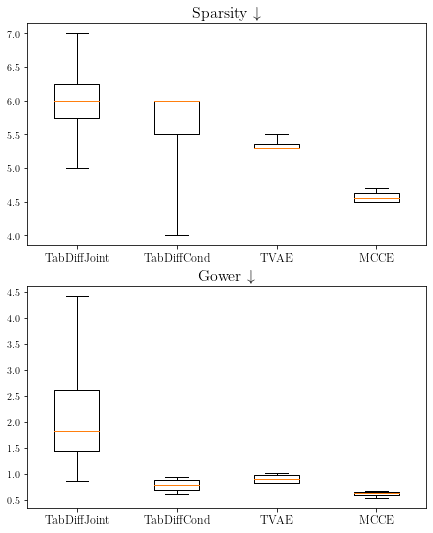

In [24]:
# ALL at once
import matplotlib as mpl
# Change some of the parameters manually here, to make plots slightly more visible in master.
mpl.rcParams["axes.titlesize"] = 16
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 10
fig, axes = plt.subplots(2,1, figsize = set_size(subplots = (2,1)))

# We set "whis" to an unreasonably large value to force the whiskers to show the min and max values.
axes[0].boxplot(df.loc[:,columns_include_L0], vert = True, whis = 100000)
axes[0].xaxis.set_ticklabels(ticklabels)
axes[0].title.set_text("Sparsity "+r"$\downarrow$")

axes[1].boxplot(df.loc[:,columns_include_Gower], vert = True, whis = 100000)
axes[1].xaxis.set_ticklabels(ticklabels)
axes[1].title.set_text("Gower "+r"$\downarrow$")

#plt.savefig("../plots/box_and_whisker_CE_metrics_"+data_code+".pdf", format="pdf", bbox_inches = "tight")

In [25]:
print(df)

   seed  L0_TabDiffJoint  L0_TabDiffCond  L0_TVAE  L0_MCCE  G_TabDiffJoint  \
0  1234              6.0             6.0      5.3      4.6        2.012564   
1  4500              6.0             6.0      5.3      4.5        1.637061   
2  2018              7.0             6.0      5.3      4.5        4.410789   
3  1999              5.0             4.0      5.5      4.7        0.855448   

   G_TabDiffCond    G_TVAE    G_MCCE  
0       0.706228  1.014451  0.636943  
1       0.859063  0.818019  0.533939  
2       0.930756  0.957679  0.668655  
3       0.610662  0.828409  0.610598  
